# Specific Heat of Solids

In [32]:
import numpy as np # import the numpy library as the "np" handle. Many numerical functions "resides" in numpy
import scipy.integrate as spi
import matplotlib as mpl
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle

mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 20

## Definition of specific heat: Model 1

$$ C =  3 R  min \left[ \frac{4 \pi^4}{5} \left(\frac{T}{T_D}\right)^3 , 1\right] $$

In [23]:
def specificHeatModelOne(temperature, debyeTemperature=100):
    '''
    simple model for specific heat of a solid
    
    Returns the molar specific heat in J/mol.K as
    as a function of the temperature (in Kelvin)
    The Debye temperature of the solid can be provided (in Kelvin)
    otherwise it is assumed to be 100 K
    '''
    R = 8.31 # molar constant in J/mol.K
    maxSpecificHeat = 3*R
    
    specificHeat = 3*R* (0.8*np.pi**4) *(temperature/debyeTemperature)**3
    if (specificHeat> maxSpecificHeat):
        specificHeat = maxSpecificHeat
    
    return specificHeat

In [35]:
specificHeatModelOne(10,4)

24.93

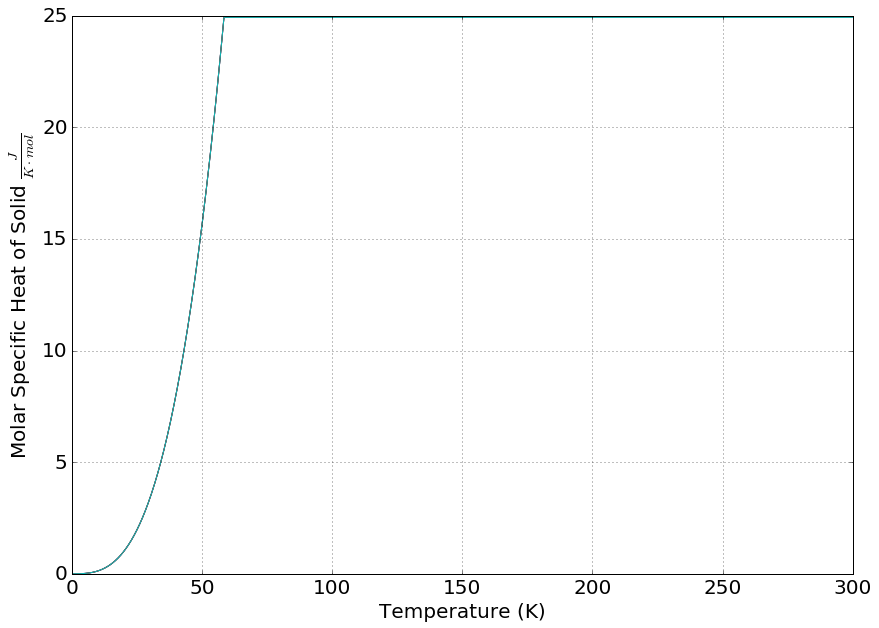

In [40]:
debyeTemperature = 250
temperatureRange= np.arange(0,300,0.1)
specificHeatRange= [specificHeatModelOne(temperature, debyeTemperature) for temperature in temperatureRange]

plt.plot(temperatureRange, specificHeatRange)
plt.xlabel('Temperature (K)')
plt.ylabel(r'Molar Specific Heat of Solid $\frac{J}{K\cdot mol}$')
plt.grid()
plt.show()

# Numerical integration

Many integrals are analytically intractable, and must be performed numerically.  Here, we show how Python can be used to numerically integrate symbolic functions and non-symbolic functions, which correspond to an array of values defined with respect to a grid.

## Riemann sum

The approach is to discretize the x-array and find the y-values associated with each x value. Using a trapezoidal rule, an approximation to the integral can be obtained.

In [49]:
debyeTemperature = 250

# define two numerical arrays
temperatureRange= np.arange(0,300,0.1)
specificHeatRange= [specificHeatModelOne(temperature, debyeTemperature) for temperature in temperatureRange]

# sum the result using the trapeizodal rule
# note that the vertical array must come first, and the horizontal array is the second one
result= spi.trapz(specificHeatRange, temperatureRange)
print(result)

6382.14627364


In [50]:
temperatureRange

array([  0.00000000e+00,   1.00000000e-01,   2.00000000e-01, ...,
         2.99700000e+02,   2.99800000e+02,   2.99900000e+02])

In [52]:
specificHeatRange;

## Quadrature

The syntax for the `quad` function is simple; input the function, the lower limit, and the upper limit. Note that $\infty$ exists in the `numpy` library as `numpy.inf`.

In [54]:

# integrate specificHeat from T=1 to T=300 with a debye temperature of 250
result =spi.quad(specificHeatModelOne,1,300,args=250,epsrel=1e-38 )
print(result)

(6384.63951392651, 1.1784159223353763e-08)


The `quad` function outputs what's known as a "tuple" in Python.  It's like an array, but you can't manipulate it.  The first element is the value of the integral, and the second element is the relative error.  The `epsrel` parameter controls the error.  If you make `epsrel` larger, you will see the relative error go up.